In [1]:
import pandas as pd

In [4]:
csv_clickbus = pd.read_csv(r'desafio clickbus\desafio clickbus\dados_desafio_fiap\hash\dados_tratados_clickbus.csv')
csv_clickbus.head()

,ID_compra,ID_cliente,Data_compra,Hora_compra,Origem_da_viagem_de_ida,Destino_da_viagem_de_ida,Origem_da_viagem_de_volta,Destino_da_viagem_de_volta,Viação_da_viagem_de_ida,Viação_da_viagem_de_volta,Valor_total_da_compra,Quantidade_de_passagens
0,bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674e...,a7218ff4ee7d37d48d2b4391b955627cb089870b934912...,2018-12-26,15:33:35,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,50e9a8665b62c8d68bccc77c7c92431a1aa26ccbd38ed4...,0,0,8527a891e224136950ff32ca212b45bc93f69fbb801c3b...,1,89.09,1
1,5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e...,37228485e0dc83d84d1bcd1bef3dc632301bf6cb22c8b5...,2018-12-05,15:07:57,10e4e7caf8b078429bb1c80b1a10118ac6f963eff098fd...,e6d41d208672a4e50b86d959f4a6254975e6fb9b088116...,0,0,36ebe205bcdfc499a25e6923f4450fa8d48196ceb4fa0c...,1,155.97,1
2,fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8e...,3467ec081e2421e72c96e7203b929d21927fd00b6b5f28...,2018-12-21,18:41:54,7688b6ef52555962d008fff894223582c484517cea7da4...,8c1f1046219ddd216a023f792356ddf127fce372a72ec9...,0,0,ec2e990b934dde55cb87300629cedfc21b15cd28bbcf77...,1,121.99,1
3,4dc44a6dd592b702feccb493d192210c86965aee684529...,ab3251a2be0f69713b8f97b0e9d1579e31551f4fd4facf...,2018-12-06,14:01:38,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,d6acb3c1a79e57bcc03d976cb4d98f56edccd4cf426392...,0,0,5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...,1,55.22,1
4,aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181...,ceea0de820a6379f2c4215bddaec66c33994b304607e56...,2021-02-23,20:08:25,7688b6ef52555962d008fff894223582c484517cea7da4...,23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f...,0,0,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...,1,45.31,1


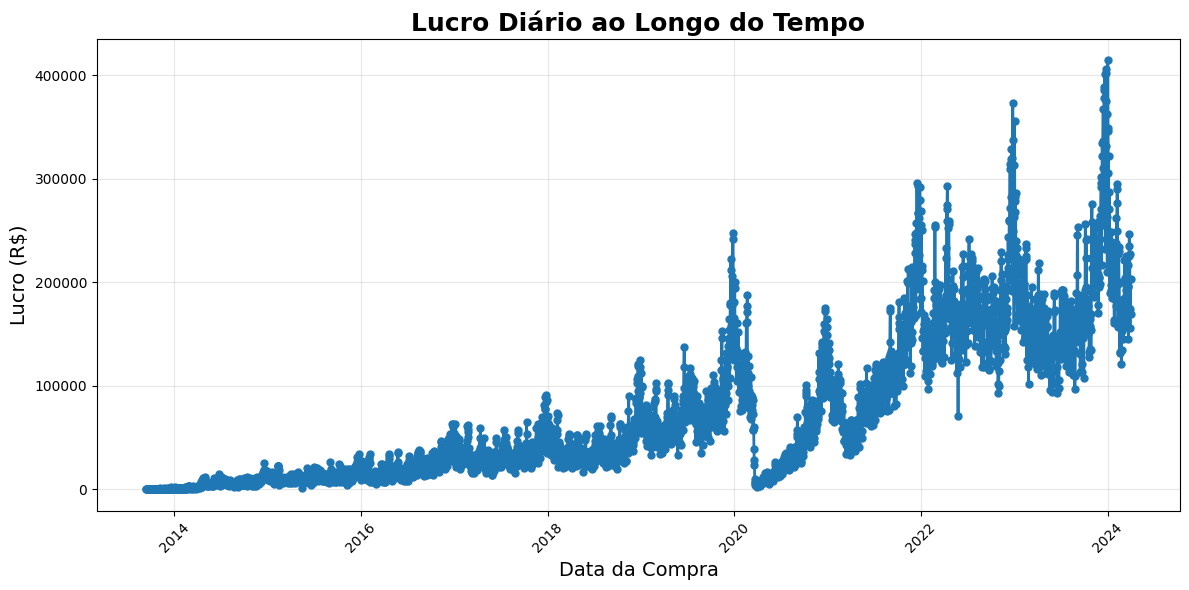

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Converte a coluna de data para datetime
csv_clickbus["Data_compra"] = pd.to_datetime(csv_clickbus["Data_compra"])

# Agrupa por data e soma o valor total das compras (lucro/faturamento diário)
df_lucro_diario = csv_clickbus.groupby("Data_compra")["Valor_total_da_compra"].sum().reset_index()

# Configura tamanho e estilo do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_lucro_diario["Data_compra"], df_lucro_diario["Valor_total_da_compra"],
         color="#1f77b4", linewidth=2, marker="o", markersize=5)

# Personalização estética
plt.title("Lucro Diário ao Longo do Tempo", fontsize=18, fontweight="bold")
plt.xlabel("Data da Compra", fontsize=14)
plt.ylabel("Lucro (R$)", fontsize=14)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibe o gráfico
plt.show()


## Mensal Lucro

C:\Users\joaoh\AppData\Local\Temp\ipykernel_26284\1061685825.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key="Data_compra", freq="M"))["Valor_total_da_compra"]


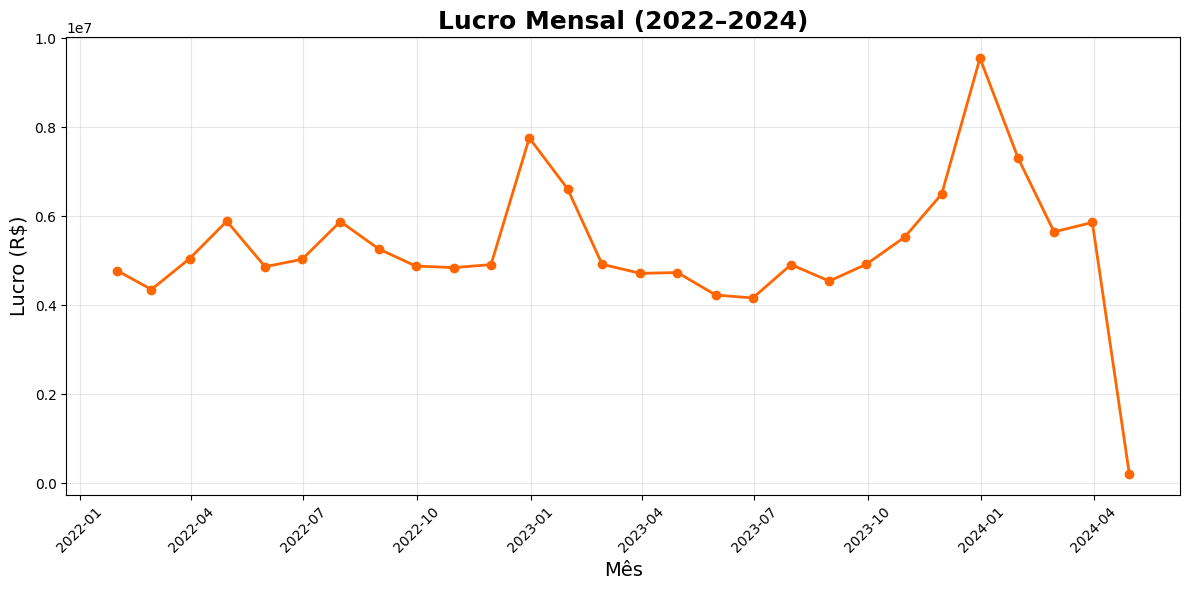

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Converte a coluna de data para datetime
csv_clickbus["Data_compra"] = pd.to_datetime(csv_clickbus["Data_compra"])

# Filtra somente de 2022 até 2024
df = csv_clickbus[(csv_clickbus["Data_compra"].dt.year >= 2022) & (csv_clickbus["Data_compra"].dt.year <= 2024)]

# Agrupa por ano e mês (formato YYYY-MM) e soma o lucro
df_lucro_mensal = (
    df.groupby(pd.Grouper(key="Data_compra", freq="M"))["Valor_total_da_compra"]
    .sum()
    .reset_index()
)

# Plot estético
plt.figure(figsize=(12, 6))
plt.plot(df_lucro_mensal["Data_compra"], df_lucro_mensal["Valor_total_da_compra"],
         color="#ff6600", linewidth=2, marker="o", markersize=6)

# Personalização
plt.title("Lucro Mensal (2022–2024)", fontsize=18, fontweight="bold")
plt.xlabel("Mês", fontsize=14)
plt.ylabel("Lucro (R$)", fontsize=14)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibe o gráfic
plt.show()
